In [46]:
#Part 4: Sample Generation

import random

def random_sample(n, m):

    Clauses = []
    Variables = []

    for i in range(n):
        Variables.append("x"+ str(i+1))
        Variables.append("¬x"+ str(i+1))

    for q in range(m):
        v1 = random.choice(Variables)
        v2 = random.choice(Variables)

        while v1 == v2 or v1 == "¬" + v2 or "¬" + v1 == v2:
            v1 = random.choice(Variables)

        Clauses.append((v1, v2))
    return Clauses


In [47]:
#Part 5: Brute Force Algorithm implementation

import itertools

def MAX_2_SAT(n, clauses):
    max_satisfied = 0

    for current_assignment in itertools.product([True, False], repeat = n):
        assignment_dic = {}
        current_satisfied = 0
        for i in range(n):
            assignment_dic["x" + str(i+1)] = current_assignment[i]
            assignment_dic["¬x" + str(i+1)] = not current_assignment[i]
        for clause in clauses:
            v1, v2 = clause
            if assignment_dic[v1] == True or assignment_dic[v2] == True:
                current_satisfied += 1

        if current_satisfied > max_satisfied:
            max_satisfied = current_satisfied

    return max_satisfied


In [48]:
#Part 5: Heuristic Algorithm implementation

def heuristic_MAX_2_SAT(n, clauses):
    max_satisfied = 0
    assignment_dic = {}
    for clause in clauses:
        v1, v2 = clause

        if v1 not in assignment_dic:
            assignment_dic[v1] = True
        if v2 not in assignment_dic:
            assignment_dic[v2] = True

        if "¬" not in v1 and assignment_dic[v1] == True:
            assignment_dic["¬" + v1] = False
        elif "¬" in v1 and assignment_dic[v1] == True:
            assignment_dic[v1[1:]] = False

        if "¬" not in v2 and assignment_dic[v2] == True:
            assignment_dic["¬" + v2] = False
        elif "¬" in v2 and assignment_dic[v2] == True:
            assignment_dic[v2[1:]] = False

        if assignment_dic[v1] == True or assignment_dic[v2] == True:
            max_satisfied += 1

    return max_satisfied


In [50]:
#Part 6: Experimental Analysis of the Performance - implementation

import time
import statistics
import numpy as np
from scipy import stats


sample_size = 100
confidence_level = 0.90

degrees_of_freedom = sample_size -1
t_value = stats.t.ppf(confidence_level, degrees_of_freedom)

running_times = []
input_number_n = []
CI_low = []
CI_high = []

for size in range(30):
    total_time = 0
    timing = []
    for i in range(sample_size):
        n = size+10
        m = (size+10) * 2
        sample_clauses = random_sample(n,m)

        start_time = time.time()
        heuristic_MAX_2_SAT(n, sample_clauses)
        end_time = time.time()
        running_time = end_time - start_time
        total_time += running_time
        timing.append(running_time)

    avr_running_time = np.mean(timing)
    std_dev = statistics.stdev(timing)
    timing.clear()
    std_error = std_dev / np.sqrt(sample_size)
    confidence_interval = (avr_running_time - (t_value * std_error), avr_running_time + (t_value * std_error))
    CI_low.append(confidence_interval[0])
    CI_high.append(confidence_interval[1])

    narrow_enough = (t_value * std_error) < 0.1
    running_times.append(avr_running_time)
    input_number_n.append(n)
    avr_running_time = f"{avr_running_time:.6f}"

    print(f"Sample size: {size}, Average running time: {avr_running_time}, Confidence interval: {confidence_interval}, is it narrow enough? {narrow_enough}")

print(running_times)


Sample size: 0, Average running time: 0.000026, Confidence interval: (2.5808313134282597e-05, 2.6686689612299436e-05), is it narrow enough? True
Sample size: 1, Average running time: 0.000029, Confidence interval: (2.8994819179423284e-05, 2.9751518711201718e-05), is it narrow enough? True
Sample size: 2, Average running time: 0.000032, Confidence interval: (3.162739237020533e-05, 3.2960200708407945e-05), is it narrow enough? True
Sample size: 3, Average running time: 0.000034, Confidence interval: (3.415885542015584e-05, 3.472027208228556e-05), is it narrow enough? True
Sample size: 4, Average running time: 0.000037, Confidence interval: (3.691414918490713e-05, 3.761073027065927e-05), is it narrow enough? True
Sample size: 5, Average running time: 0.000040, Confidence interval: (3.9099364685810955e-05, 4.0155739379130456e-05), is it narrow enough? True
Sample size: 6, Average running time: 0.000043, Confidence interval: (4.194696295176587e-05, 4.378358972157397e-05), is it narrow enoug

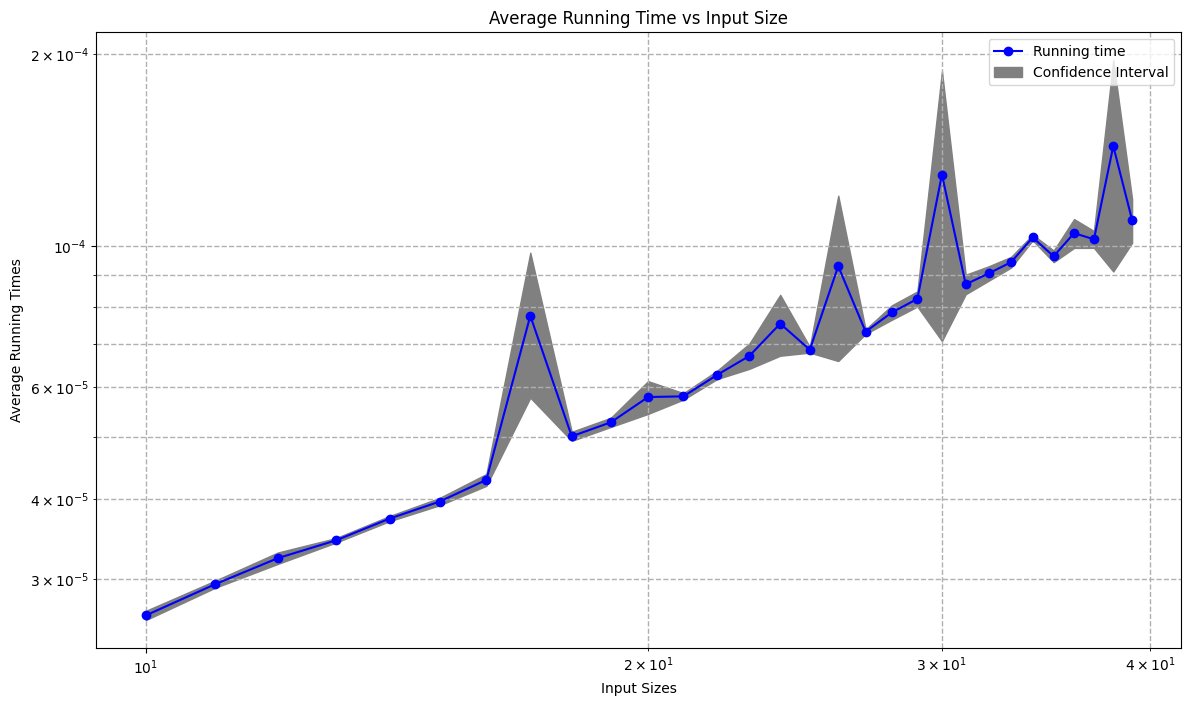

In [51]:
#Part 6: Experimental Analysis of the Performance - Chart

import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.plot(input_number_n, running_times, color='blue', marker='o',label='Running time')
plt.fill_between(input_number_n , CI_low, CI_high, color='grey',label='Confidence Interval')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Input Sizes')
plt.ylabel('Average Running Times')
plt.title('Average Running Time vs Input Size')
plt.grid(which="both", ls="--", linewidth=1)
plt.legend()

plt.show()



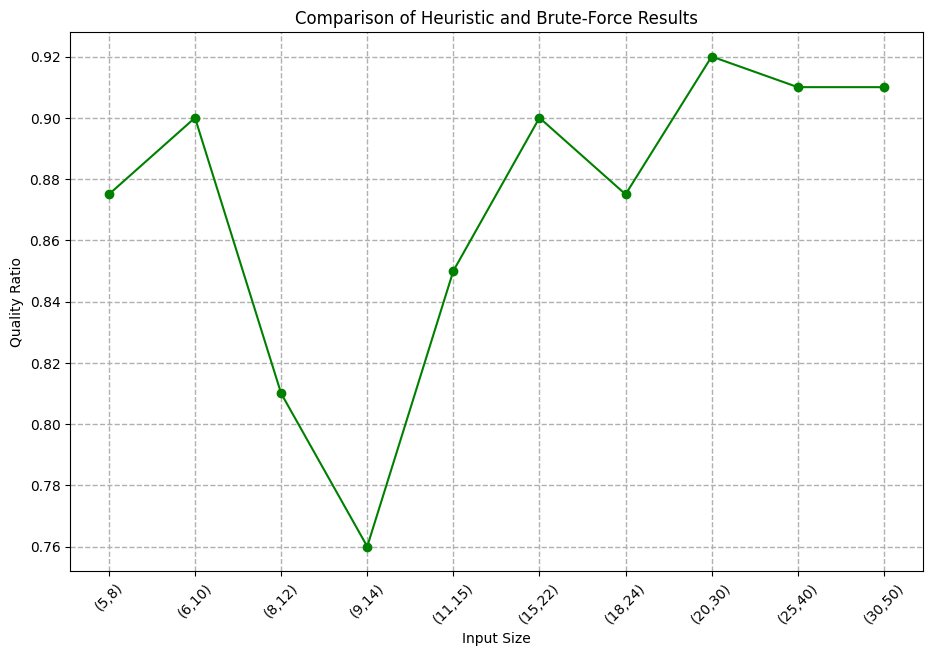

In [52]:
#Part 7: Experimental Analysis of the Quality

input_size = ["(5,8)","(6,10)","(8,12)","(9,14)","(11,15)","(15,22)","(18,24)","(20,30)","(25,40)","(30,50)"]
ratio = [0.875,0.9,0.81,0.76,0.85,0.9,0.875,0.92,0.91,0.91]

plt.figure(figsize=(11,7))

plt.plot(input_size, ratio, color='green', marker='o',label='Comparison of Heuristic and Brute-Force')
plt.xticks(rotation=45)
plt.xlabel('Input Size')
plt.ylabel('Quality Ratio')
plt.title('Comparison of Heuristic and Brute-Force Results')
plt.grid(which="both", ls="--", linewidth=1)


plt.show()

In [53]:
#Part 8: Experimental Analysis of the Correctness- Black Box Testing

#Test Case 1: All Clauses Satisfied
n = 3
Clauses = [('x1', '¬x3'),('¬x2', 'x3'),('x1', 'x3')]
output1 = heuristic_MAX_2_SAT(n, Clauses)
assert output1


#Test Case 2: Reverse Clauses
n = 4
Clauses = [('x1', 'x4'),('x2', 'x3'),('¬x1', '¬x4'),('¬x2', '¬x3')]
output2 = heuristic_MAX_2_SAT(n, Clauses)
assert output2


#Test Case 3: All Literals are Positive
n = 3
Clauses = [('x1', 'x2'),('x2', 'x3'),('x1', 'x3')]
output3 = heuristic_MAX_2_SAT(n, Clauses)
assert output3


#Test Case 4: All Literals are Negative
n = 3
Clauses = [('¬x1', '¬x2'),('¬x2', '¬x3'),('¬x1', '¬x3')]
output4 = heuristic_MAX_2_SAT(n, Clauses)
assert output4

print("All test cases succesfully completed")


All test cases succesfully completed


In [54]:
#Part 8: Experimental Analysis of the Correctness- White Box Testing

#Statement Coverage
#Test Case 1: Executes every line
n = 4
Clauses = [('x1', '¬x2'),('¬x3', 'x4')]
assert heuristic_MAX_2_SAT(n, Clauses) == 2

#Decision Coverage
#Test Case 1: Checks every if-else conditions
n = 4
Clauses = [('x1', '¬x2'),('¬x3', 'x4'),('¬x1', 'x2'),('x3', '¬x4')]
assert heuristic_MAX_2_SAT(n, Clauses) == 2

#Path Coverage
#Test Case 1: Two unassigned variables
n = 4
Clauses = [('x1', '¬x2'),('¬x3', 'x4')]
assert heuristic_MAX_2_SAT(n, Clauses) == 2

#Test Case 2: One assigned variable and one unassigned variable
n = 3
Clauses = [('x1', '¬x2'),('¬x3', 'x2')]
assert heuristic_MAX_2_SAT(n, Clauses) == 2

#Test Case 3: Two assigned variables
n = 2
Clauses = [('x1', '¬x2'),('¬x1', 'x2')]
assert heuristic_MAX_2_SAT(n, Clauses) == 1

print("All test cases succesfully completed")

All test cases succesfully completed
